In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='str')

In [5]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.dtypes[df.dtypes == "string"]

make                 str
model                str
engine_fuel_type     str
transmission_type    str
driven_wheels        str
market_category      str
vehicle_size         str
vehicle_style        str
dtype: object

In [7]:
all_str = list(df.dtypes[df.dtypes == "string"].index)

In [8]:
df[all_str] = df[all_str].apply(lambda x: x.str.lower().str.replace(" ", "_").str.strip())

In [9]:
df[all_str]

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
0,bmw,1_series_m,premium_unleaded_(required),manual,rear_wheel_drive,"factory_tuner,luxury,high-performance",compact,coupe
1,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,convertible
2,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,high-performance",compact,coupe
3,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,"luxury,performance",compact,coupe
4,bmw,1_series,premium_unleaded_(required),manual,rear_wheel_drive,luxury,compact,convertible
...,...,...,...,...,...,...,...,...
11909,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11910,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11911,acura,zdx,premium_unleaded_(required),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback
11912,acura,zdx,premium_unleaded_(recommended),automatic,all_wheel_drive,"crossover,hatchback,luxury",midsize,4dr_hatchback


In [10]:
df.dtypes

make                     str
model                    str
year                   int64
engine_fuel_type         str
engine_hp            float64
engine_cylinders     float64
transmission_type        str
driven_wheels            str
number_of_doors      float64
market_category          str
vehicle_size             str
vehicle_style            str
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
for cl in df.columns:
    print(cl)
    print(df[cl].unique()[:5])
    print(df[cl].nunique())

make
<StringArray>
['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler']
Length: 5, dtype: str
48
model
<StringArray>
['1_series_m', '1_series', '100', '124_spider', '190-class']
Length: 5, dtype: str
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
<StringArray>
[   'premium_unleaded_(required)',               'regular_unleaded',
 'premium_unleaded_(recommended)',       'flex-fuel_(unleaded/e85)',
                         'diesel']
Length: 5, dtype: str
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
<StringArray>
['manual', 'automatic', 'automated_manual', 'direct_drive', 'unknown']
Length: 5, dtype: str
5
driven_wheels
<StringArray>
['rear_wheel_drive', 'front_wheel_drive', 'all_wheel_drive',
 'four_wheel_drive']
Length: 4, dtype: str
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
<StringArray>
['factory_tuner,luxury,high-performance',
                    'luxury,performance',
               'luxury,high-performance

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

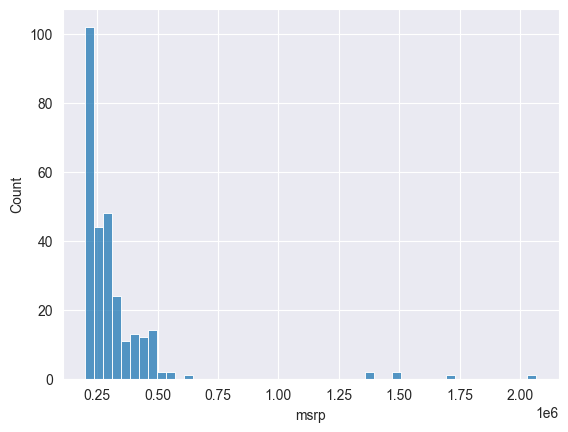

In [13]:
sns.histplot(df[df.msrp > 200000].msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

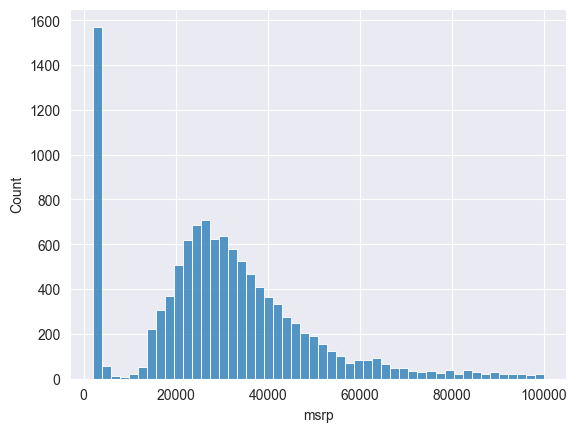

In [14]:
sns.histplot(df[df.msrp < 100000].msrp, bins=50)

In [15]:
np.log([1,10,100,1000,100000000]) #log10 = 0 does not exist

array([ 0.        ,  2.30258509,  4.60517019,  6.90775528, 18.42068074])

In [16]:
np.log1p([0,1,10,100,1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [17]:
price_logs = np.log1p(df.msrp)

In [18]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

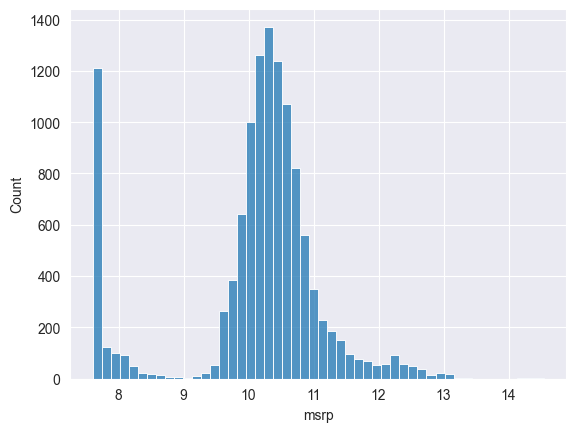

In [19]:
sns.histplot(price_logs, bins=50)

In [20]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [21]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = sum([n, -n_val, -n_test])

In [22]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [23]:
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [24]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

We need to shuffle all the data

In [25]:
idx = np.arange(n)

In [26]:
np.random.seed(2)
np.random.shuffle(idx)

In [27]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [28]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [29]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [30]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [32]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [33]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [34]:
del df_train["msrp"]
del df_val["msrp"]
del df_test["msrp"]

In [35]:
df_train.iloc[10] # random car

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [36]:
xi = [453, 11, 86] #features for car - HP, city MPG, popularitu

In [37]:
w0 = 7.17 #biased term
w = [0.01, 0.04, 0.002] #weights of the features

In [38]:
def linear_regression(xi: list, w0: int | float, w: list):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred += xi[j] * w[j]
    return pred

In [39]:
linear_regression(xi=xi, w0=w0, w=w)

12.312

In [40]:
# g(xi) = w0 + w1xi1 + w2xi2 + w3xi3 <- this is the actual dot product
# g(xi) = w0 + sum(wjxij)

In [41]:
np.expm1(12.312) # minus 1 to undo the +1 we made with logarithm earlier
# this price is 2 times lower than the actual price

np.float64(222347.2221101062)

In [42]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res += xi[j] * w[j]
    return res

In [43]:
def linear_regression(xi: list, w0: int | float, w: list):
    return w0 + dot(xi, w)

In [44]:
linear_regression(xi=xi, w0=w0, w=w)

12.312000000000001

In [45]:
# w = [w0, w1, w2, ..., wn] n + 1 vector where w0 is biased
# xi = [xi0, xi1, xi2,..., xin] where xi0 == 1

In [46]:
w_new = [w0] + w

In [47]:
w_new


[7.17, 0.01, 0.04, 0.002]

In [48]:
def linear_regression(xi: list):
    xi = [1] + xi
    return dot(xi, w_new)

In [49]:
linear_regression(xi=xi)

12.312

In [50]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

In [51]:
X = [x1 ,x2 , x10]

In [52]:
X = np.array(X)

In [53]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [54]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [55]:
def linear_regression(X):
    return X @ w_new

In [56]:
linear_regression(X=X)

array([12.38 , 13.552, 12.312])

In [57]:
# X @ w = y feature matrix @ weights vector = target prediction
# X^-1 @ X @ w = X^-1 @ y
# w = X^-1 @ y if X^-1 exists only if X is square matrix

In [58]:
# we can adjust
# XT @ X @ w = XT @ y where XTX is square matrix
# (XT @ X)^-1 @ XT @ X @ w = (XT @ X)^-1 @ XT @ y
# w = (XT @ X)^-1 @ XT @ y

In [59]:
def train_linear_regression(X, y):
    pass

In [60]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [61]:
X = [[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86]]

In [62]:
X

[[148, 24, 1385],
 [132, 25, 2031],
 [453, 11, 86],
 [158, 24, 185],
 [172, 25, 201],
 [413, 11, 86],
 [38, 54, 185],
 [142, 25, 431],
 [453, 31, 86]]

In [63]:
X = np.array(X)

In [64]:
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [65]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
X = np.column_stack([ones, X])

In [67]:
XTX = X.T @ X

In [68]:
XTX_inv = np.linalg.inv(XTX)

In [69]:
(XTX @ XTX_inv).round(2)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

In [70]:
y = [1000, 2000, 1500, 2500, 1000, 2000, 1500, 2500, 1200]
y

[1000, 2000, 1500, 2500, 1000, 2000, 1500, 2500, 1200]

In [71]:
w_full = XTX_inv @ X.T @ y

In [72]:
w_full

array([ 3.00067767e+03, -2.27742529e+00, -2.57694130e+01, -2.30120640e-01])

In [73]:
w0 = w_full[0]
w = w_full[1:]

In [74]:
w0, w

(np.float64(3000.677669255554),
 array([ -2.27742529, -25.76941296,  -0.23012064]))

In [75]:
X = [[148, 24, 1385],
[132, 25, 2031],
[453, 11, 86],
[158, 24, 185],
[172, 25, 201],
[413, 11, 86],
[38, 54, 185],
[142, 25, 431],
[453, 31, 86]]
X = np.array(X)

In [76]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T @ X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv @ X.T @ y
    return w_full[0], w_full[1:]

In [77]:
train_linear_regression(X=X, y=y)

(np.float64(3000.677669255554),
 array([ -2.27742529, -25.76941296,  -0.23012064]))

In [78]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [79]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='str')

In [80]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [81]:
X_train = df_train[base].values
X_train, y_train

(array([[ 148.,    4.,   33.,   24., 1385.],
        [ 132.,    4.,   32.,   25., 2031.],
        [ 148.,    4.,   37.,   28.,  640.],
        ...,
        [ 285.,    6.,   22.,   17.,  549.],
        [ 563.,   12.,   21.,   13.,   86.],
        [ 200.,    4.,   31.,   22.,  873.]], shape=(7150, 5)),
 array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978], shape=(7150,)))

In [82]:
train_linear_regression(X_train, y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

In [83]:
X_train = df_train[base].fillna(0).values # it is better to fill na with mean value than zeroes

In [84]:
w0, w = train_linear_regression(X_train, y_train)

In [85]:
y_pred = w0 + X_train @ w

<Axes: ylabel='Count'>

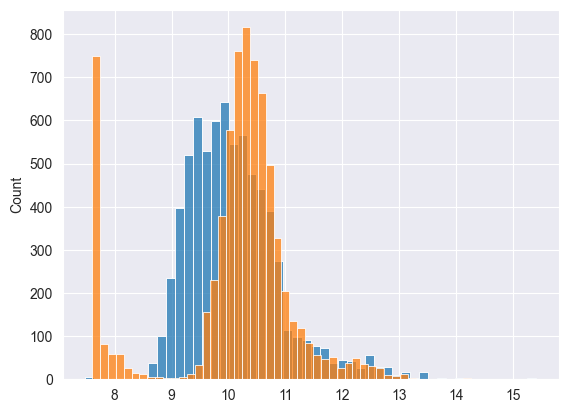

In [86]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_train, bins=50)

In [87]:
#RMSE
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [88]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [89]:
#Validation
#Need to retrain model on validation data
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train @ w


In [90]:
def prepare_x(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [91]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred)


np.float64(0.761653099130156)

In [92]:
# Create new feature - age aka year
max(df_train["year"]) - df_train["year"] # data was collected in 2017 so we take 2017 as max

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [93]:
def prepare_x(df):
    df = df.copy()
    df["age"] = max(df["year"]) - df["year"]
    features = base + ["age"]
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [94]:
X_train = prepare_x(df_train)

In [95]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [96]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='str')

In [97]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

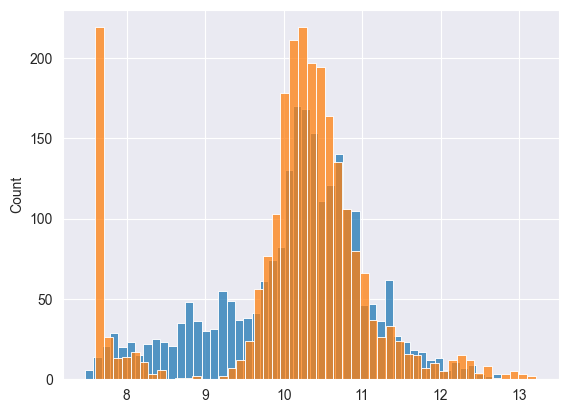

In [98]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

In [99]:
df_train.number_of_doors # number of doors is a float, but it is categorical value
# e.g. cars can be either 2-door, 3-door, 4-door and 5-door* (*not present in dataset)
# so we make binary columns 2D, 3D, 4D
# car with 2 doors - True, False, False [(1, 0, 0),
# car with 3 doors - False, True, False (0, 1, 0),
# car with 4 doors - False, False, True (0. 0. 1)]

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [100]:
(df_train.number_of_doors == 2).astype("int") # convert bool -> integer

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

In [101]:
for v in [2, 3, 4]:
    df_train[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype("int") # convert bool -> integer


In [102]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [103]:
del df_train[f"num_doors_2"]
del df_train[f"num_doors_3"]
del df_train[f"num_doors_4"]

In [104]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [105]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    df["age"] = max(df["year"]) - df["year"]
    features.append("age")
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype("int") # convert bool -> integer
        features.append(f"num_doors_{v}")
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [106]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred) # number of doors is not very useful

np.float64(0.5186588617185612)

In [107]:
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [108]:
makes = list(df.make.value_counts().head(n=5).index)

In [109]:
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [110]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    df["age"] = max(df["year"]) - df["year"]
    features.append("age")
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df_train.number_of_doors == v).astype("int") # convert bool -> integer
        features.append(f"num_doors_{v}")
    for make in makes:
        df[f"make_{make}"] = (df_train.make == make).astype("int") # convert bool -> integer
        features.append(f"make_{make}")
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [111]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred) # number of doors is not very useful

np.float64(0.5306449707685919)

<Axes: ylabel='Count'>

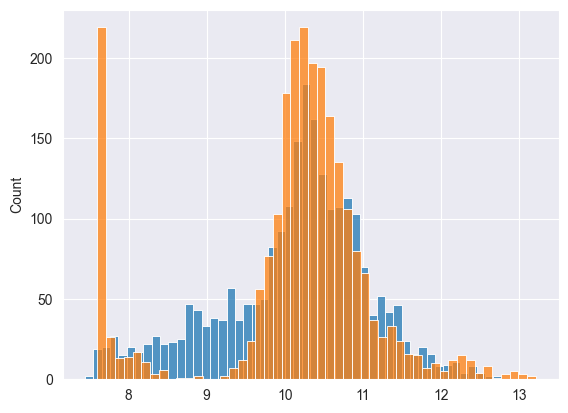

In [112]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

In [113]:
df_train.dtypes

make                     str
model                    str
year                   int64
engine_fuel_type         str
engine_hp            float64
engine_cylinders     float64
transmission_type        str
driven_wheels            str
number_of_doors      float64
market_category          str
vehicle_size             str
vehicle_style            str
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [114]:
categories = ["make", "engine_fuel_type", "transmission_type", "driven_wheels", "market_category", "vehicle_size", "vehicle_style"]
categories_dict = {cat: list(df[cat].value_counts().head(n=5).index) for cat in categories}

In [152]:
categorical_columns = [
    'make', 'transmission_type', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [151]:
categories_dict

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [171]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    df["age"] = 2017 - df["year"]    # previous with max() was wrong because we needed the max value from ALL of the values, not from the function
    features.append("age")
    for v in [2, 3, 4]:
        df[f"num_doors_{v}"] = (df.number_of_doors == v).astype("int") # convert bool -> integer
        features.append(f"num_doors_{v}")
    for c_key, c_value in categories_dict.items():
        for itm in c_value:
            df[f"{c_key}_{itm}"] = (df[c_key] == itm).astype("int") # convert bool -> integer
            features.append(f"{c_key}_{itm}")
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [172]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression(X_train, y_train)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred) # this is horrendous
# this happens because the inverse of XTX does not exist

np.float64(23.019020704791835)

<Axes: ylabel='Count'>

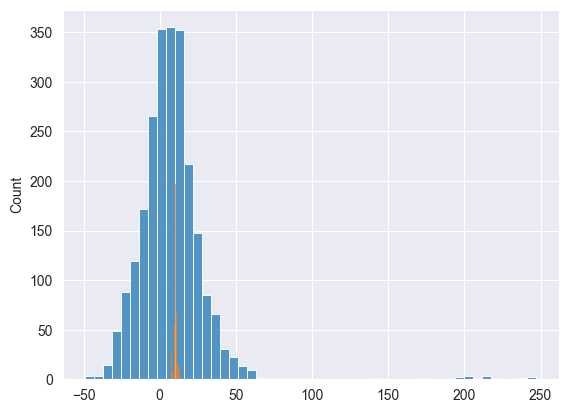

In [173]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

In [174]:
X = [[4,4,4], [2, 3, 3], [5, 1, 1], [7, 2, 2]]

In [175]:
X = np.array(X)

In [176]:
X

array([[4, 4, 4],
       [2, 3, 3],
       [5, 1, 1],
       [7, 2, 2]])

In [177]:
X.T @ X # Inverse of such matrix does not exist

array([[94, 41, 41],
       [41, 30, 30],
       [41, 30, 30]])

In [178]:
np.linalg.inv(X.T @ X)  # Exception LinAlgError: Singular matrix

LinAlgError: Singular matrix

In [179]:
X = [[4,4,4], [2, 3, 3], [5, 1, 1], [7, 2, 2.000005]] #Adding noise to values actually creates a very bad matrix
y = [1,2,3,1]
X = np.array(X)
XTX_inv = np.linalg.inv(X.T @ X)  # No Exception but values are HUGE, so the features become huge as well
XTX_inv @ X.T @ y  # first value is good, others are terrible

array([ 5.60089756e-01,  5.51382624e+05, -5.51382706e+05])

In [180]:
# Adding small values to diagonal solves this problem
XTX = [[1,2,2],[2,1,1.000001],[2,1.000001,1]]
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333556e-01,  3.33333389e-01,  3.33333389e-01],
       [ 3.33333389e-01, -5.00000083e+05,  4.99999917e+05],
       [ 3.33333389e-01,  4.99999917e+05, -5.00000083e+05]])

In [181]:
# Adding small values to diagonal solves this problem
XTX = [[1.001,2,2],[2,1.001,1.000001],[2,1.000001,1.001]]
XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33667112e-01,  3.33500195e-01,  3.33500195e-01],
       [ 3.33500195e-01,  5.00417042e+02, -5.00583959e+02],
       [ 3.33500195e-01, -5.00583959e+02,  5.00417042e+02]])

In [182]:
# You can add values with eye matrix (eye has only 1 on diagonal)
XTX = [[1,2,2],[2,1,1.000001],[2,1.000001,1]]
XTX = XTX + 0.1 * np.eye(3)
np.linalg.inv(XTX)


array([[-0.36906879,  0.35149392,  0.35149392],
       [ 0.35149392,  4.90338917, -5.09671083],
       [ 0.35149392, -5.09671083,  4.90338917]])

In [183]:
def train_linear_regression_regularized(X, y, r=0.001):
    # ones = np.ones(X.shape[0])
    # X = np.column_stack([ones, X])
    # XTX = X.T @ X
    # XTX = XTX + r * np.eye(XTX.shape[0])  # add regularization
    # XTX_inv = np.linalg.inv(XTX)
    # w_full = XTX_inv @ X.T @ y
    # return w_full[0], w_full[1:]
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [184]:
for r in [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.0, 1.0, 5.0, 10.0, 15.0, 100.0]:
    # Training part
    X_train = prepare_x(df_train)
    w0, w = train_linear_regression_regularized(X_train, y_train, r=r)
    # Validation part
    X_val = prepare_x(df_val)
    y_pred = w0 + X_val @ w
    # Get RMSE
    score = rmse(y_val, y_pred)
    print(r, w0, score)


1e-05 6.178192055025445 0.45651702823445617
0.0001 6.317246071243372 0.4565170654323052
0.001 6.285636717989048 0.45651750867781377
0.01 6.2766071476973995 0.45652199012897743
0.1 6.1912087238544915 0.4565692763007501
0.0 4011091003551887.0 23.019020704791835
1.0 5.634896668066369 0.45722043179930605
5.0 4.753342547779816 0.4622930016735736
10.0 4.283980108968471 0.4701456932099909
15.0 3.9901714149438776 0.4778577401368236
100.0 2.4990470830043594 0.578670946247553


In [185]:
# Training part
X_train = prepare_x(df_train)
w0, w = train_linear_regression_regularized(X_train, y_train, r=0.01)
# Validation part
X_val = prepare_x(df_val)
y_pred = w0 + X_val @ w
# Get RMSE
rmse(y_val, y_pred)

np.float64(0.45652199012897743)

<Axes: ylabel='Count'>

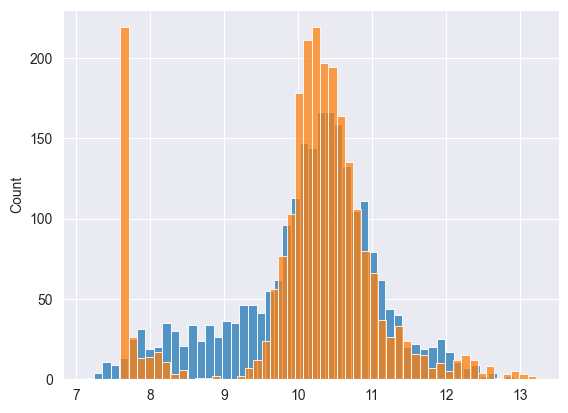

In [186]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_val, bins=50)

In [187]:
df_train, df_test, df_val

(             make        model  year                engine_fuel_type  \
 0       chevrolet       cobalt  2008                regular_unleaded   
 1          toyota       matrix  2012                regular_unleaded   
 2          subaru      impreza  2016                regular_unleaded   
 3      volkswagen      vanagon  1991                regular_unleaded   
 4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
 ...           ...          ...   ...                             ...   
 7145          bmw     4_series  2015     premium_unleaded_(required)   
 7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
 7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
 7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
 7149   volkswagen           cc  2017  premium_unleaded_(recommended)   
 
       engine_hp  engine_cylinders transmission_type      driven_wheels  \
 0         148.0               4.0            m

In [188]:
df_full_train = pd.concat([df_train, df_val])

In [189]:
df_full_train = df_full_train.reset_index(drop=True)

In [190]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [191]:
X_full_train = prepare_x(df_full_train)

In [192]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [193]:
y_full_train = np.concatenate([y_train, y_val])

In [194]:
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ], shape=(9532,))

In [195]:
w0, w = train_linear_regression_regularized(X_full_train, y_full_train, r=0.01)
# Validation part
X_test = prepare_x(df_test)
y_pred = w0 + X_test @ w
# Get RMSE
rmse(y_test, y_pred)

np.float64(0.4517787580982509)

In [196]:
np.float64(0.5919051744911753)

np.float64(0.5919051744911753)

In [197]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [198]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [204]:
X_small = prepare_x(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [205]:
y_pred = w0 + X_small @ w
y_pred[0]

np.float64(10.462575850726985)

In [206]:
np.expm1(y_pred[0])  # prediction

np.float64(34980.54272737918)

In [202]:
y_test[20]

np.float64(10.463131911491967)

In [203]:
np.expm1(y_test[20])  # actual price

np.float64(35000.00000000001)